In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

23.0 33.58
98.43 106.14
22.51 33.59
98.43 105.69
[ 7 14 14 14 14 14  3 14 14  6  5  6 12 12 12  6 10  5 14  8  5 14 12 10
  9  9  9  9  9  9  9  9  9  9  9  9 14  7 10  9 10  5  9  5  8  7  2 10
 12  3  3  8  8 12  1  7  7 10  3 11 14 14  7  1  0  0  0  6  6  7  0  0
  0 10  6  7 13 13 13 14  0 14 14 12 13 11  4  2  7 14 14 14  8  3  1  1
  9 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 12 14 14 14
 12 14 14 14  0 14 14 14 14 14  7  4  8 14  7  0 14 13 12 14  2  5 14 10
 14 14 14  6  5  0  5 14 14  1 10 14  6  0 14 14  6  6 14  1  8  4 14  0
 14 14 14  6  0  9  8  0 14 14  6 14 14 14  5  5  5 14 10 14  8]


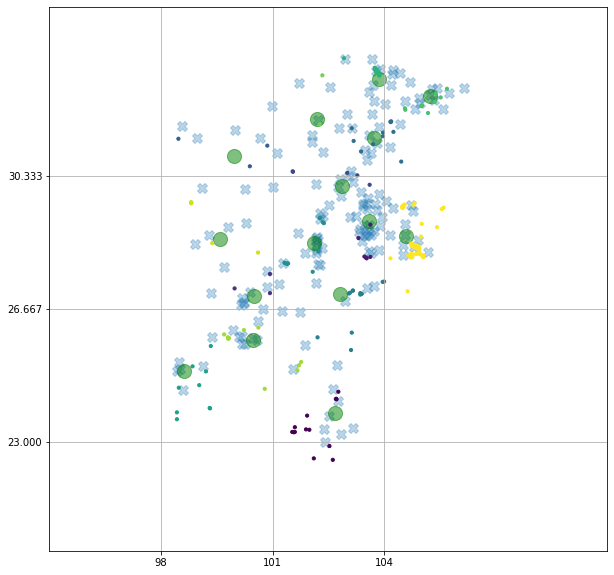

In [10]:
station_info = pd.read_csv("StationInfo.csv")
stations = list(station_info['StationID'])
station_lat = list(station_info['Latitude'])
station_log = list(station_info['Longitude'])

print(min(station_lat), max(station_lat))
print(min(station_log), max(station_log))

fig = plt.figure(figsize=(10, 10))
ax = fig.gca()
ax.set_xlim([95, 110])
ax.set_ylim([20, 35])
ax.set_xticks(np.arange(98, 107, (107-98)/3))
ax.set_yticks(np.arange(23, 34, (34-23)/3))
# plt.scatter(station_log, station_lat, s = 100, alpha = 0.3, marker='X')
plt.grid(True)

eq_info = pd.read_csv("eqlst.csv")
eq_log = list(eq_info['Longitude'])
eq_lat = list(eq_info['Latitude'])

print(min(eq_lat), max(eq_lat))
print(min(eq_log), max(eq_log))

# plt.scatter(eq_log, eq_lat, s = 10)

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=15)
X = list(zip(station_log, station_lat))
kmeans.fit(X)
plt.scatter(station_log, station_lat, s = 100, alpha = 0.3, marker='X')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='green', s=200, alpha=0.5);

X = list(zip(eq_log, eq_lat))
y_kmeans = kmeans.predict(X)
print(y_kmeans)
plt.scatter(eq_log, eq_lat, c = y_kmeans, s = 10)

plt.show()

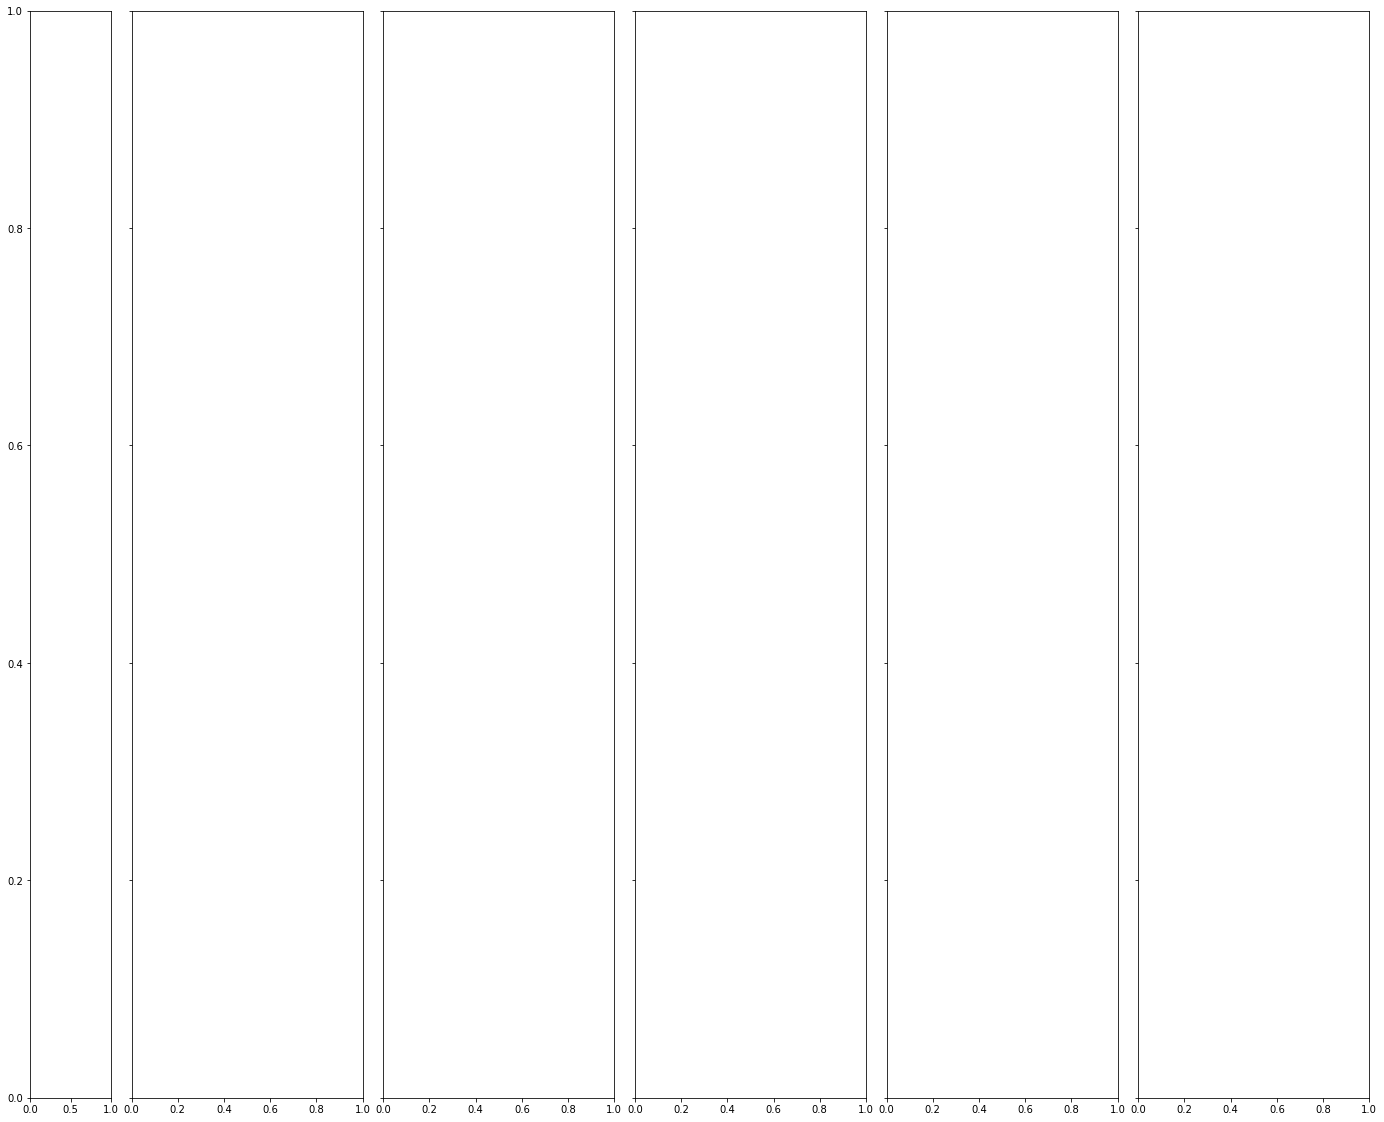

In [5]:
fig, axs = plt.subplots(1, 6, sharey=True, figsize = (24,20), gridspec_kw={'width_ratios': [0.7,2,2,2,2,2]})
fig.subplots_adjust(wspace=0.1)